#ML 스터디 8강

In [ ]:
#MNIST 데이터셋 가져오기
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

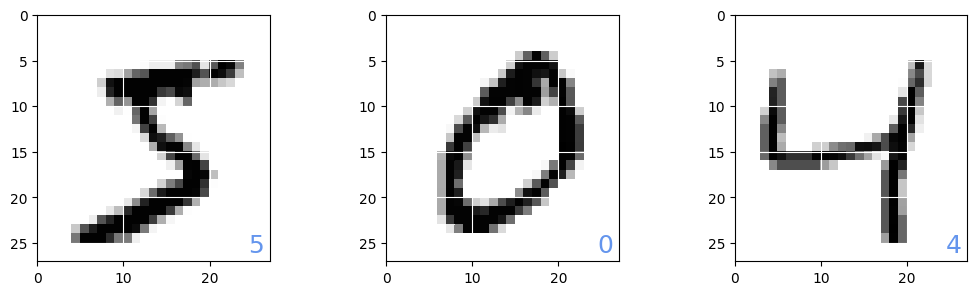

In [ ]:
#가져온 MNIST 데이터셋 확인
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()

for id in range(3):
    plt.subplot(1, 3, id + 1)
    img = x_train[id, :, :]
    plt.pcolor(255 - img)
    plt.text(24.5, 26, "%d" % y_train[id],
             color="cornflowerblue", fontsize=18)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.grid('on', color="white")

plt.show()

In [ ]:
!pip install keras

In [ ]:
#데이터 가공
from tensorflow import keras
from keras.utils import to_categorical

x_train = x_train.reshape(60000, 784)
x_train = x_train.astype('float32')
x_train = x_train / 255
num_classes = 10
y_train = to_categorical(y_train, num_classes)

x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = to_categorical(y_test, num_classes)

28x28 이미지 데이터를 784 길이의 벡터로 처리.

즉, 60000x28x28의 배열을 60000x784의 배열로 변환.

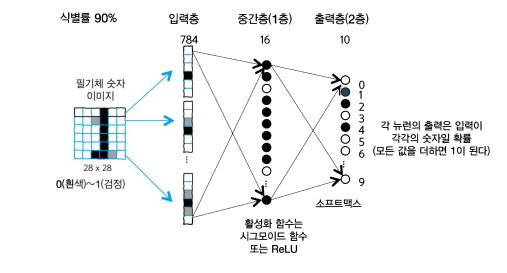

optimizer로 Adam 사용

Adam = 경사 하강법을 세련되게 만든 알고리즘

In [ ]:
np.random.seed(1)

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim=784, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


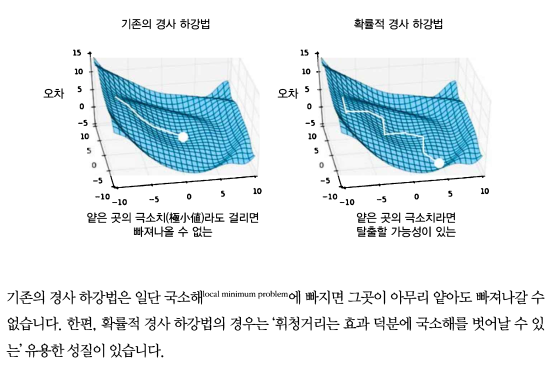

In [ ]:
import time

startTime = time.time()

history = model.fit(x_train, y_train, epochs=10, batch_size=1000,
                    verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Computation time: {0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.0976 - loss: 2.3983 - val_accuracy: 0.1183 - val_loss: 2.3232
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0997 - loss: 2.3169 - val_accuracy: 0.1457 - val_loss: 2.3021
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1100 - loss: 2.3031 - val_accuracy: 0.1301 - val_loss: 2.2988
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1130 - loss: 2.3012 - val_accuracy: 0.1312 - val_loss: 2.2973
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1123 - loss: 2.3013 - val_accuracy: 0.1328 - val_loss: 2.2960
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1109 - loss: 2.3016 - val_accuracy: 0.1341 - val_loss: 2.2943
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1138 - loss: 2.3011 - val_accuracy: 0.1363 - val_loss: 2.2932
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1101 - loss: 2.3014 - val_accuracy: 0.1390 - val_lo

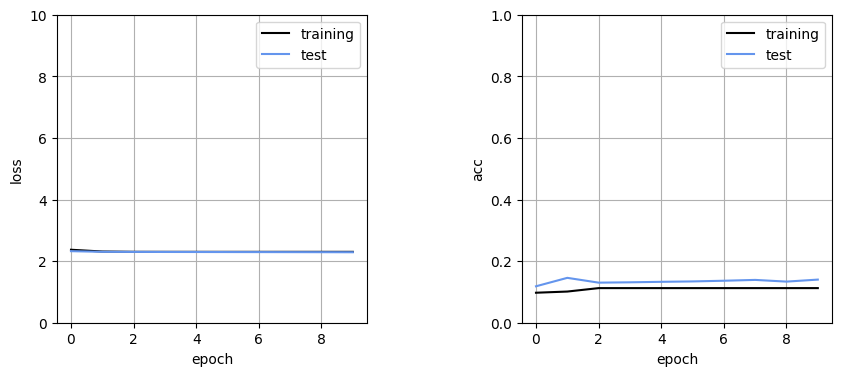

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test', color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'], label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

In [ ]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color="cornflowerblue", linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

시그모이드 함수는 입력 x가 어느 정도 커지면 항상 1에 가까운 값을 출력하기 때문에, 입력의 변화가 출력에 반영되기 어렵다. 그 결과, 오차 함수의 가중치 매개 변수에 대한 편미분이 0에 가까운 값이 되어, 경사 하강법의 학습이 늦어지는 문제점이 있다. 그러나 ReLU를 사용하면 학습의 정체 문제가 해결되고 프로그램에서 max(0, x)로 쉽게 나타낼 수 있어 계산이 빠르다는 장점이 존재한다.

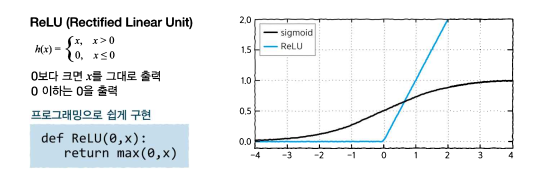

In [ ]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(), metrics=['accuracy'])

startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=10,
                    verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Computation time: {0:.3f} sec".format(time.time() - startTime))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.1023 - loss: 2.3023 - val_accuracy: 0.0717 - val_loss: 2.3612
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1110 - loss: 2.3017 - val_accuracy: 0.0723 - val_loss: 2.3593
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1135 - loss: 2.3011 - val_accuracy: 0.0753 - val_loss: 2.3579
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1127 - loss: 2.3013 - val_accuracy: 0.0774 - val_loss: 2.3563
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1103 - loss: 2.3014 - val_accuracy: 0.0775 - val_loss: 2.3549
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1146 - loss: 2.3009 - val_accuracy: 0.0785 - val_loss: 2.3531
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1112 - loss: 2.3011 - val_accuracy: 0.0793 - val_loss: 2.3518
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1130 - loss: 2.3011 - val_accuracy: 0.0815 - val_los

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


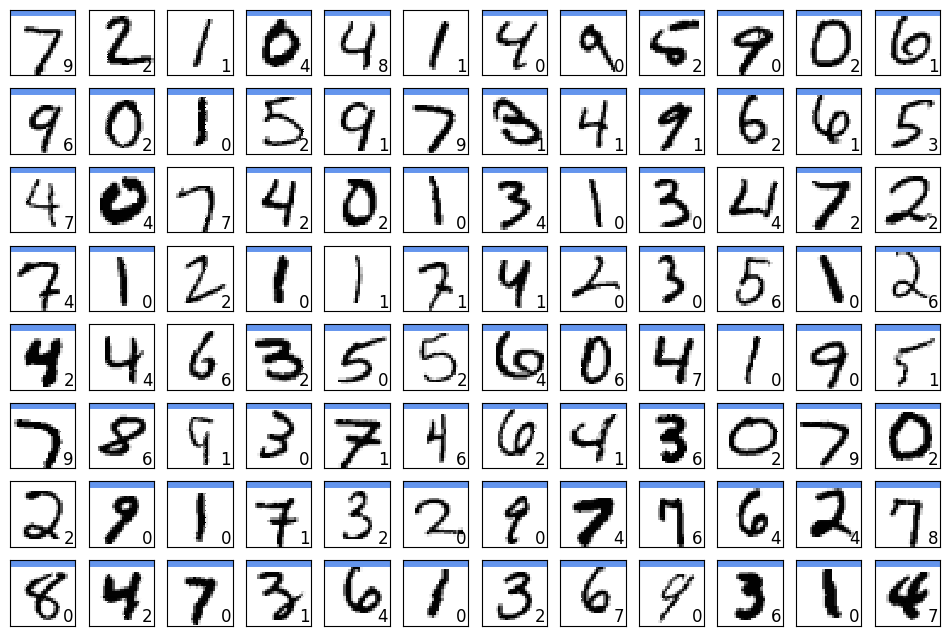

In [ ]:
show_prediction()
plt.show()

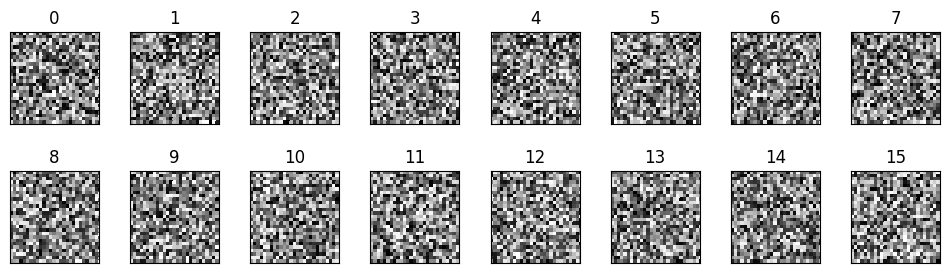

In [ ]:
w = model.layers[0].get_weights()[0]
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)

for i in range(16):
    plt.subplot(2, 8, i + 1)
    w1 = w[:, i]
    w1 = w1.reshape(28, 28)
    plt.pcolor(-w1)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
plt.show()

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


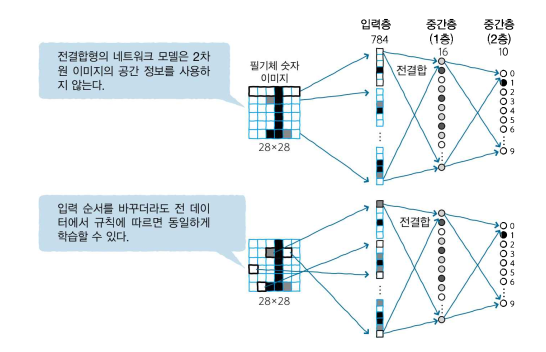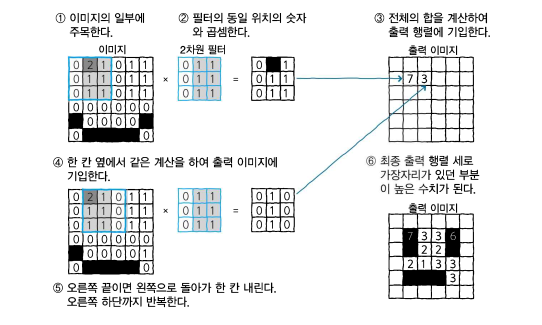

In [ ]:
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

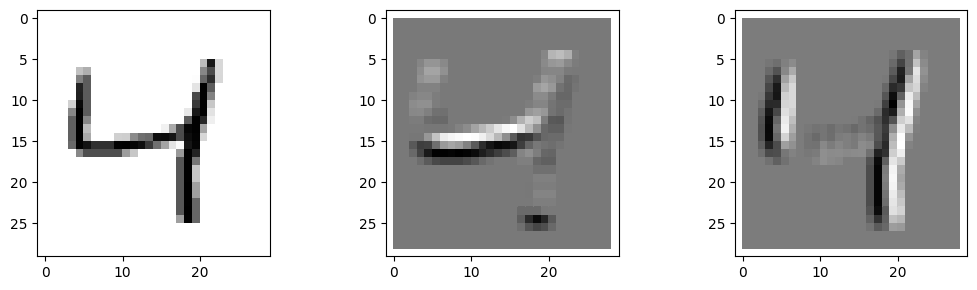

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

id_img = 2
myfill1 = np.array([[1, 1, 1],
                    [1, 1, 1],
                    [-2, -2, -2]], dtype=float)
myfill2 = np.array([[-2, 1, 1],
                    [-2, 1, 1],
                    [-2, 1, 1]], dtype=float)

x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

for ih in range(img_h - 3):
    for iw in range(img_w - 3):
        img_part = x_img[ih:ih + 3, iw:iw + 3]
        out_img1[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), myfill1.reshape(-1))
        out_img2[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), myfill2.reshape(-1))

plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()

plt.subplot(1, 3, 1)
plt.pcolor(1 - x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)

plt.subplot(1, 3, 2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)

plt.subplot(1, 3, 3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)

plt.show()

In [ ]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(8, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20,
                    verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Computation time: {0:.3f} sec".format(time.time() - startTime))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 209ms/step - accuracy: 0.6573 - loss: 1.2847 - val_accuracy: 0.9043 - val_loss: 0.3472
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 208ms/step - accuracy: 0.9040 - loss: 0.3317 - val_accuracy: 0.9246 - val_loss: 0.2696
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 196ms/step - accuracy: 0.9256 - loss: 0.2604 - val_accuracy: 0.9384 - val_loss: 0.2191
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 208ms/step - accuracy: 0.9386 - loss: 0.2174 - val_accuracy: 0.9493 - val_loss: 0.1859
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 245ms/step - accuracy: 0.9503 - loss: 0.1834 - val_accuracy: 0.9573 - val_loss: 0.1612
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 213ms/step - accuracy: 0.9577 - loss: 0.1550 - val_accuracy: 0.9626 - val_loss: 0.1410
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 204ms/step - accuracy: 0.9655 - loss: 0.1303 - val_accuracy: 0.9661 - val_loss: 0.1281
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 209ms/step - accuracy: 0.9686 - loss: 0.1155 - val_accu

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


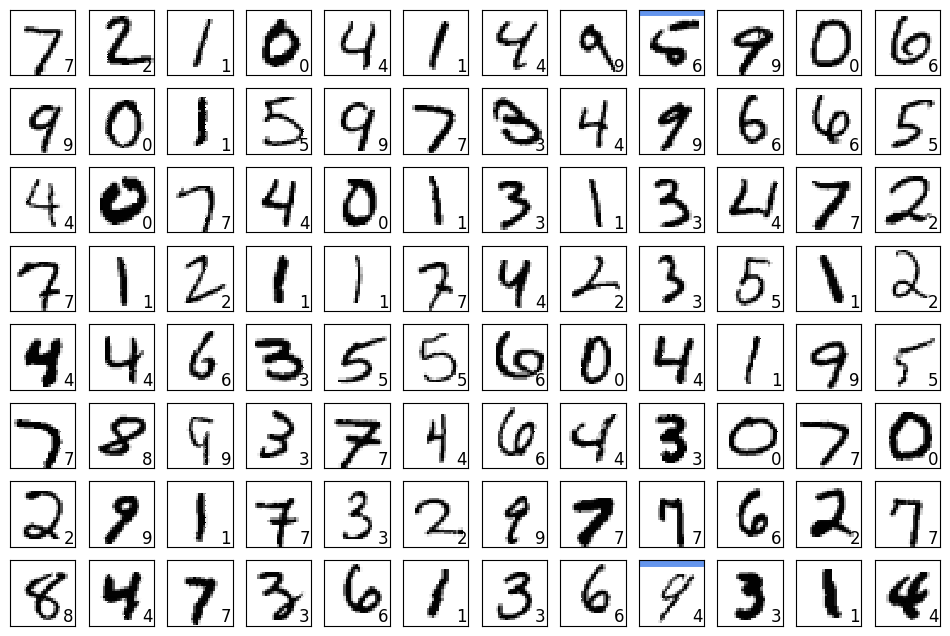

In [ ]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color="cornflowerblue", linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

show_prediction()
plt.show()

패딩과 스트라이드

> 패딩은 필터를 적용했을 때의 출력 이미지가 작아지는 것에 대한 대응책, 스트라이드는 필터가 움직이는 간격이어서 스트라이드가 커지면 출력 이미지가 작아짐

드롭아웃 정규화

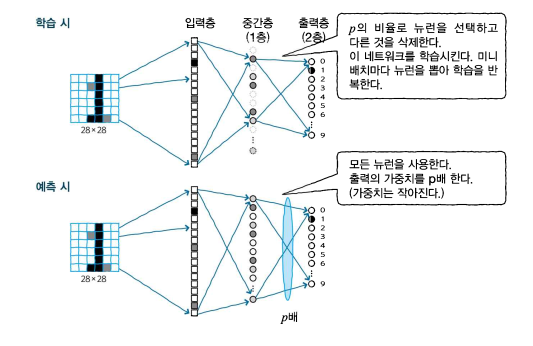

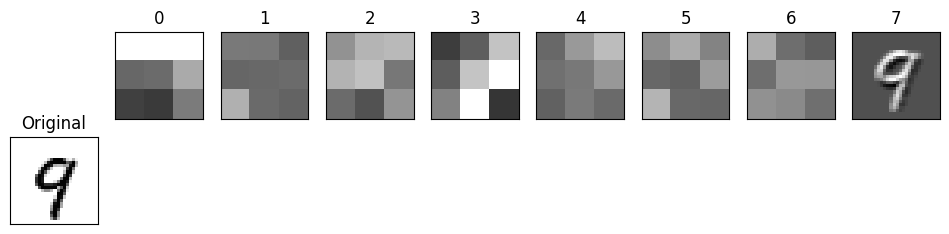

In [ ]:
plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2, 9, 10)

id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")

w = model.layers[0].get_weights()[0]
max_w = np.max(w)
min_w = np.min(w)
for i in range(8):
    plt.subplot(2, 9, i + 2)
    w1 = w[:, :, 0, i]
    w1 = w1.reshape(3, 3)
    plt.pcolor(-w1, vmin=min_w, vmax=max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)

out_img = np.zeros_like(x_img)
for ih in range(img_h - 3):
    for iw in range(img_w - 3):
        img_part = x_img[ih:ih + 3, iw:iw + 3]
        out_img[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), w1.reshape(-1))
plt.pcolor(-out_img)
plt.xlim(0, img_w)
plt.ylim(img_h, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.show()

In [ ]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20,
                    verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Computation time: {0:.3f} sec".format(time.time() - startTime))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.6224 - loss: 1.2596 - val_accuracy: 0.9647 - val_loss: 0.1174
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9524 - loss: 0.1528 - val_accuracy: 0.9820 - val_loss: 0.0597
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9721 - loss: 0.0923 - val_accuracy: 0.9853 - val_loss: 0.0443
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9785 - loss: 0.0720 - val_accuracy: 0.9870 - val_loss: 0.0383
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9818 - loss: 0.0585 - val_accuracy: 0.9893 - val_loss: 0.0306
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9844 - loss: 0.0484 - val_accuracy: 0.9908 - val_loss: 0.0290
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9866 - loss: 0.0425 - val_accuracy: 0.9908 - val_loss: 0.0250
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9891 - loss: 0.0366 - val_accuracy: 0.9919 - val_l

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


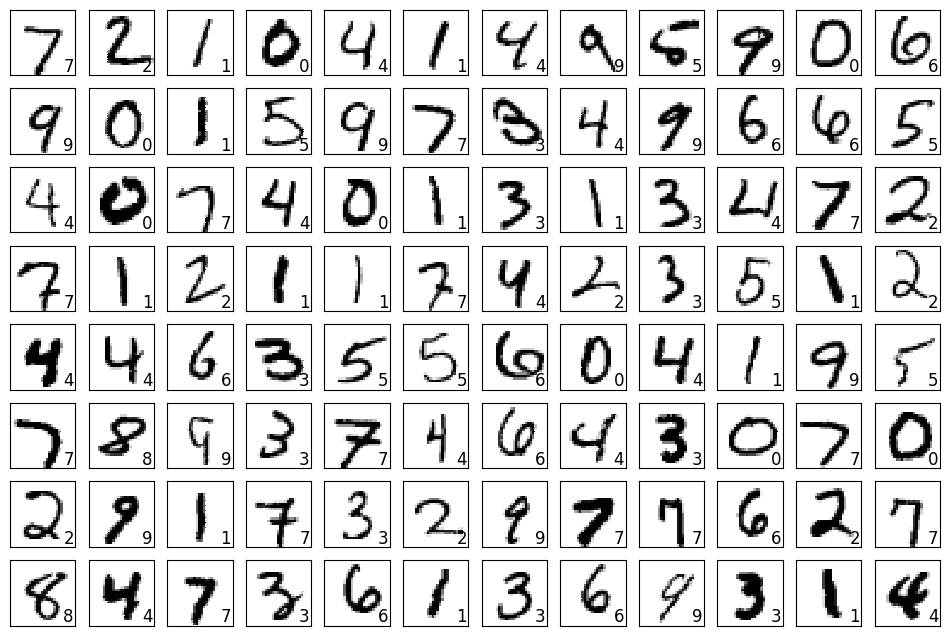

In [ ]:
show_prediction()
plt.show()